## Import library

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

## Extracting features and target labels

In [20]:
df = pd.read_csv("D:/Introduce to AI/week1/iris.csv")
df_split_X = df[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']] 
df_split_Y = df['Name']

print(df.head())
print(df.columns)


   SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa
Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'], dtype='object')


## #data train 50%, data test 50%

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_split_X, df_split_Y, test_size=0.5, random_state=42)

## consider the depth of the tree to be 3 to avoid overfitting

In [16]:
Decision_T_Model = DecisionTreeClassifier(max_depth=3, random_state=42)
Decision_T_Model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

## Ues the trained model to predict labels for the test data

In [26]:
y_pred = Decision_T_Model.predict(X_test)

## compare two data

In [31]:
accuracy = accuracy_score(y_test, y_pred)

## print last conditional sentence in the model

In [34]:
tree_rules = export_text(Decision_T_Model, feature_names=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth'])
print(tree_rules)
print(f"Accuracy: {accuracy * 100:.2f}%")

|--- PetalLength <= 2.35
|   |--- class: Iris-setosa
|--- PetalLength >  2.35
|   |--- PetalLength <= 5.05
|   |   |--- PetalWidth <= 1.60
|   |   |   |--- class: Iris-versicolor
|   |   |--- PetalWidth >  1.60
|   |   |   |--- class: Iris-virginica
|   |--- PetalLength >  5.05
|   |   |--- SepalLength <= 6.05
|   |   |   |--- class: Iris-virginica
|   |   |--- SepalLength >  6.05
|   |   |   |--- class: Iris-virginica

Accuracy: 100.00%


## Encode predicted labels into numbers for visualization

In [37]:
label_encoder = LabelEncoder()
y_pred_encoded = label_encoder.fit_transform(y_pred) 

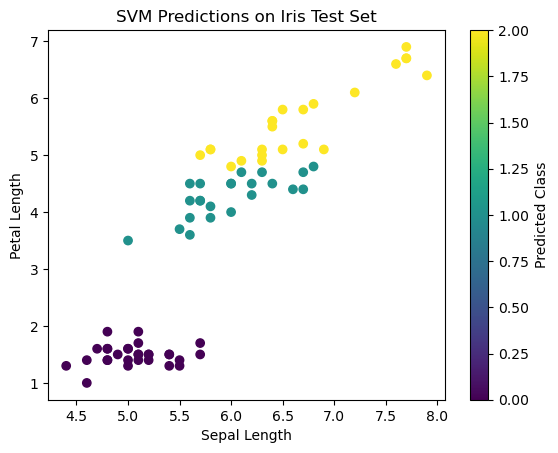

In [39]:
plt.scatter(X_test['SepalLength'], X_test['PetalLength'], c=y_pred_encoded, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.title('SVM Predictions on Iris Test Set')
plt.colorbar(label='Predicted Class')  
plt.show()